Data loading and exploration


In [5]:
import pandas as pd

df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.head(10) # exploring values and determing most important columns for analysis

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [7]:
df['price_range'].unique() # checking if there is any unexpected values in prices

array([1, 2, 3, 0])

In [11]:
df.duplicated().sum() # checking for duplicates

0

Data Cleaning and Preprocessing

In [12]:
nans = df.isnull().sum() # checking is there any NaN values in data
nans

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


Data set is already pretty clean, have no missing or NaN values, all important numerical columns already standardized. No unnecessary data

Statistical Analysis and Visualisation

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
# importing all necessary librarys for analysis and checking core statistic values for all columns
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Analysis of the main attributes influencing the choice of phone buyers. Variability analysis

Battery power statistics, distribution and correlations

In [17]:
# calculating mean, median, std for all important numerical columns
mean_battery = df['battery_power'].mean()
median_battery = df['battery_power'].median()
mode_battery = df['battery_power'].mode().iloc[0]
print(f"Mean battery power: {mean_battery}")
print(f"Median battery power: {median_battery}")
print(f"Mode battery power: {mode_battery}")
print(f"Max battery power: {df['battery_power'].max()}, min :{df['battery_power'].min()}")

Mean battery power: 1238.5185
Median battery power: 1226.0
Mode battery power: 618
Max battery power: 1998, min :501


the difference between the minimum and maximum battery capacity is quite large, while the average value is much closer to the maximum, this suggests that the low indicator is less common and only in very budget models, and most models have a battery capacity of 1200

In [23]:
battery_range = df['battery_power'].max() - df['battery_power'].min()
print(f"Battery power range: {battery_range}")
battery_variance = df['battery_power'].var()
print(f"Battery power variance: {battery_variance}")
battery_std = df['battery_power'].std()
print(f"Battery power standard deviation: {battery_std}")

Battery power range: 1497
Battery power variance: 193088.35983766866
Battery power standard deviation: 439.4182060835312


In [28]:
battery_skewness = df['battery_power'].skew()
print(f"Battery power skewness: {battery_skewness}")
battery_kurtosis = df['battery_power'].kurtosis()
print(f"Battery power kurtosis: {battery_kurtosis}")

Battery power skewness: 0.03189847179278164
Battery power kurtosis: -1.2241438831965528


here we have a little right skewness, almost normally distributed data, which tell us that we have some outliers on the higher end (expensive models) and kurtosis -1.2 tells us that we have a low amount of that outliers

In [39]:
# to conduct testing among 4 groups (by price) use anova testing
prices_groups = [df[df['price_range']== i]['battery_power'] for i in df['price_range'].unique()]
result = stats.f_oneway(*prices_groups)
print(f"F-statistic: {result.statistic}, p-value: {result.pvalue}")

F-statistic: 31.598157539897333, p-value: 5.948688277085545e-20


P-value ≥ 0.05: there is no statistically significant difference, all group means are likely equal. Цe can say that we have a large number of phone models with different batteries from small to large in all price categories and these parameters do not greatly influence each other

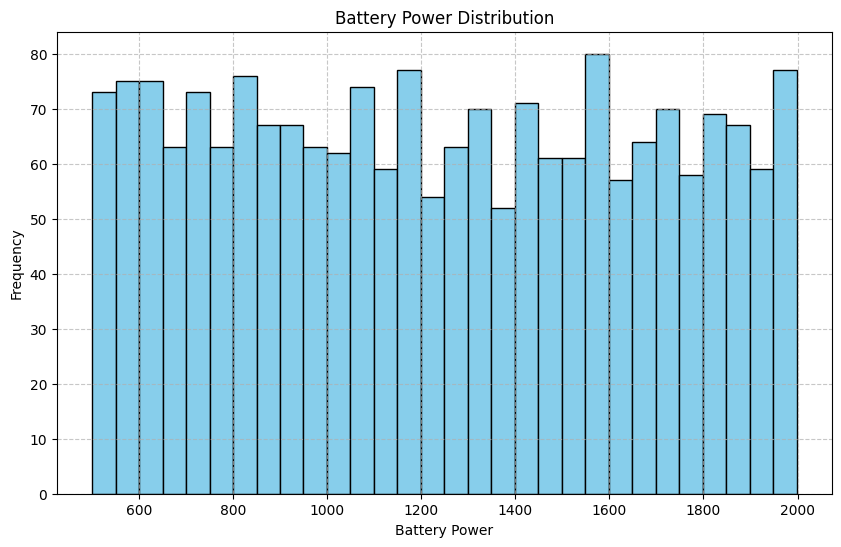

In [57]:
plt.figure(figsize=(10,6)) # creating simple histogram for value distribution analysis
df['battery_power'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Battery Power Distribution')
plt.xlabel('Battery Power')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

we can highlight the most popular battery sizes - 800, 1200, 1600, 2000

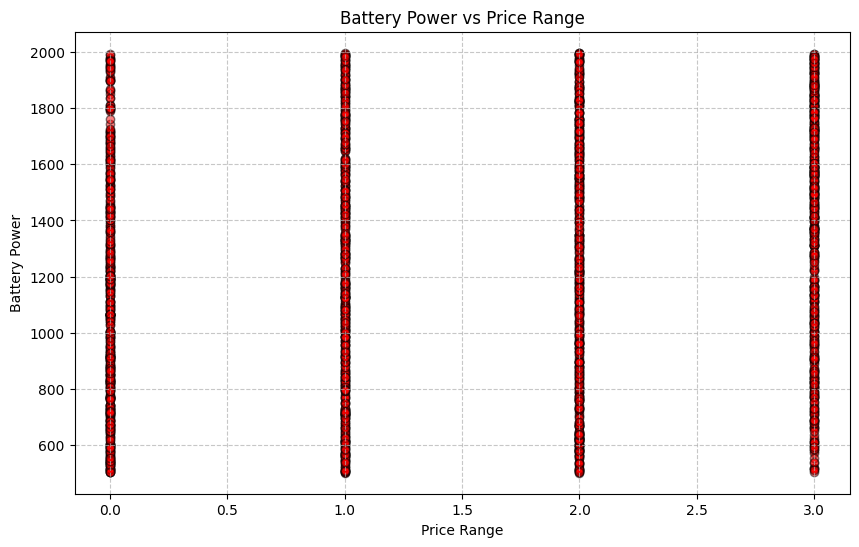

In [61]:
plt.figure(figsize=(10,6))
plt.scatter(df['price_range'], df['battery_power'], alpha=0.5, edgecolor='k', color='red')
plt.title('Battery Power vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In this graph we see that we have outliers in the lowest and highest price categories. Phones with 1800 and 2000 battery capacity are less common in the lowest price category compared to all others. and batteries with a capacity of 600 are found most rarely only in the most expensive price category

<ipython-input-115-37cb2299f985>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['price_range', 'battery_power_group']).size().reset_index(name='count')


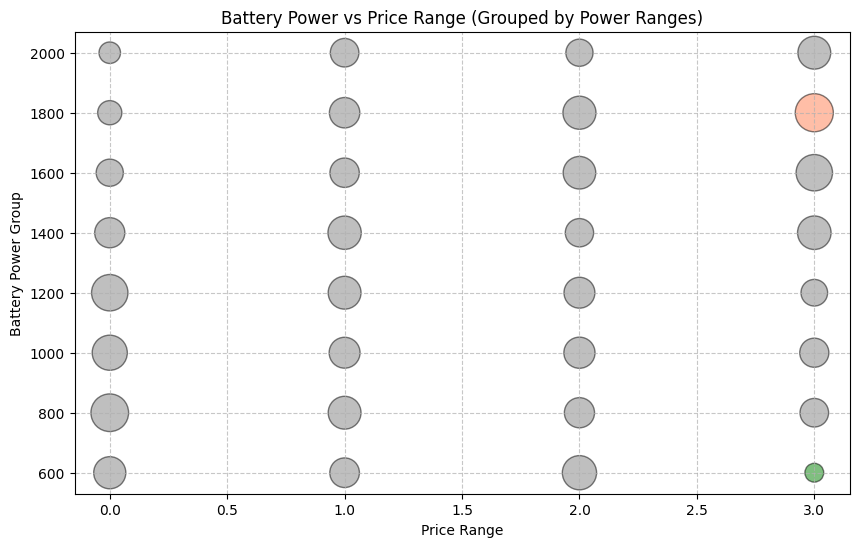

In [115]:
# creating bins for most common values of battery power to visualise variability
battery_bins = [0, 650, 850, 1050, 1250, 1450, 1650, 1850, 2000]
battery_labels = [600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

df['battery_power_group'] = pd.cut(df['battery_power'], bins=battery_bins, labels=battery_labels, right=False)
grouped_data = df.groupby(['price_range', 'battery_power_group']).size().reset_index(name='count')
# using amount of each bins as size of dots
max_count = grouped_data['count'].max()
min_count = grouped_data['count'].min()
colors = grouped_data['count'].apply(lambda x: 'coral' if x == max_count else ('green' if x == min_count else 'grey'))
# defining max and min values and colors for better visualisation

plt.figure(figsize=(10,6))
plt.scatter(grouped_data['price_range'], grouped_data['battery_power_group'],
            s=grouped_data['count']*8, # scaling size of points for better readability
            alpha=0.5, edgecolor='k', color=colors)

plt.title('Battery Power vs Price Range (Grouped by Power Ranges)')
plt.xlabel('Price Range')
plt.ylabel('Battery Power Group')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

here we also see that the fewest batteries are 600 in the highest price category. However, you can also notice that most of the phones presented with a 1800 battery (which is the most popular value) are the most expensive among all categories. This means that for the most expensive phones this parameter is significant for the client and they more often choose a phone with a large battery, taking this characteristic into account when choosing. Accordingly, it can be noted that wealthy clients, all other things being equal, will choose a phone with a 1600, 1800 or 2000 battery rather than any other model

<ipython-input-66-96bd68e75e1c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='battery_power', data=df, palette='Set2')


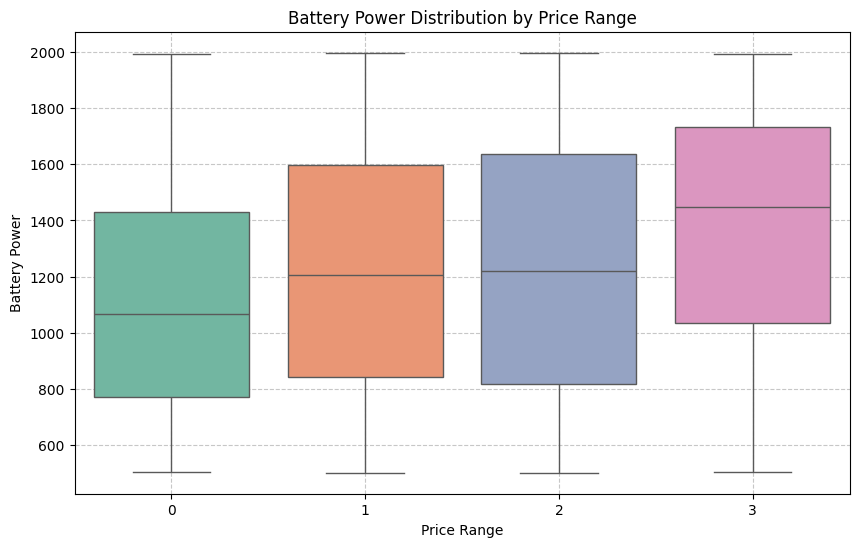

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(x='price_range', y='battery_power', data=df, palette='Set2')
plt.title('Battery Power Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

here we clearly see the average values ​​and understand that the more expensive the phone model, the more often we will see a larger battery, despite the outliers

Number of cores statistics, distribution and correlations

In [18]:
mean_n_cores = df['n_cores'].mean()
median_n_cores = df['n_cores'].median()
mode_n_cores = df['n_cores'].mode().iloc[0]
print(f"Mean cores number: {mean_n_cores}")
print(f"Median cores number: {median_n_cores}")
print(f"Mode cores number: {mode_n_cores}")
print(f"Max cores number: {df['n_cores'].max()}, min :{df['n_cores'].min()}")

Mean cores number: 4.5205
Median cores number: 4.0
Mode cores number: 4
Max cores number: 8, min :1


In [24]:
cores_range = df['n_cores'].max() - df['n_cores'].min()
print(f"Cores amount range: {cores_range}")
cores_variance = df['n_cores'].var()
print(f"Cores amount variance: {cores_variance}")
cores_std = df['n_cores'].std()
print(f"Cores amount standard deviation: {cores_std}")

Cores amount range: 7
Cores amount variance: 5.234196848424202
Cores amount standard deviation: 2.287836718042658


In [29]:
cores_skewness = df['n_cores'].skew()
print(f"Cores amount skewness: {cores_skewness}")
cores_kurtosis = df['n_cores'].kurtosis()
print(f"Cores amount kurtosis: {cores_kurtosis}")

Cores amount skewness: 0.0036275083137803994
Cores amount kurtosis: -1.229749766610346


Cores distribution is normal, phones with all possible core values ​​can be presented in all price categories

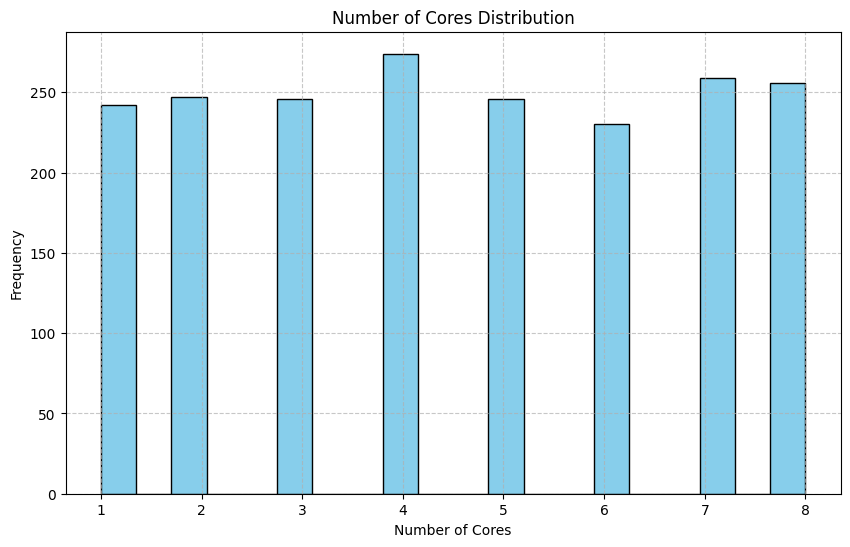

In [74]:
plt.figure(figsize=(10,6))
df['n_cores'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Number of Cores Distribution')
plt.xlabel('Number of Cores')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

the most popular values ​​are 4,7 and 8. The least popular is 6. The most common models in all price categories have 4 cores

<ipython-input-68-0c6446521684>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='n_cores', data=df, palette='pastel')


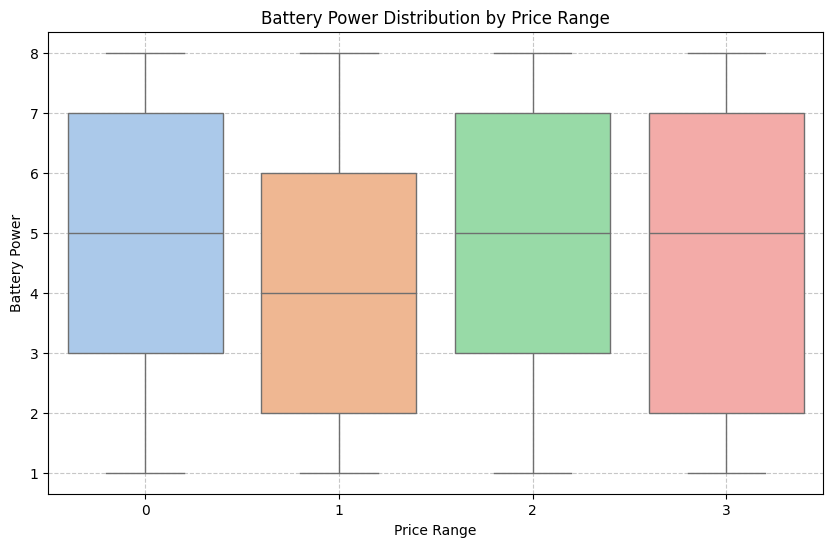

In [68]:
plt.figure(figsize=(10,6))
sns.boxplot(x='price_range', y='n_cores', data=df, palette='pastel')
plt.title('Battery Power Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Here we see unusual values ​​for the lowest and highest price categories. Surprisingly, in the most budget versions there are models with 7 cores, while at low prices there are up to 6 cores. And the most expensive models surprisingly have 2 and 3 core phones

Ram amount statistics, distribution and correlations

In [19]:
mean_ram = df['ram'].mean()
median_ram = df['ram'].median()
mode_ram = df['ram'].mode().iloc[0]
print(f"Mean ram amount: {mean_ram}")
print(f"Median ram amount: {median_ram}")
print(f"Mode ram amount: {mode_ram}")
print(f"Max ram amount: {df['ram'].max()}, min :{df['ram'].min()}")

Mean ram amount: 2124.213
Median ram amount: 2146.5
Mode ram amount: 1229
Max ram amount: 3998, min :256


Taking into account the average value for all models, the lowest value is 256, which is probably an outlier

In [25]:
ram_range = df['ram'].max() - df['ram'].min()
print(f"Ram amount range: {ram_range}")
ram_variance = df['ram'].var()
print(f"Ram amount variance: {ram_variance}")
ram_std = df['ram'].std()
print(f"Ram amount standard deviation: {ram_std}")

Ram amount range: 3742
Ram amount variance: 1176643.6064342167
Ram amount standard deviation: 1084.7320436099492


In [30]:
ram_skewness = df['ram'].skew()
print(f"Ram amount skewness: {ram_skewness}")
ram_kurtosis = df['ram'].kurtosis()
print(f"Ram amount kurtosis: {ram_kurtosis}")

Ram amount skewness: 0.006628035398750348
Ram amount kurtosis: -1.1919130700631546


ram values normally distributed

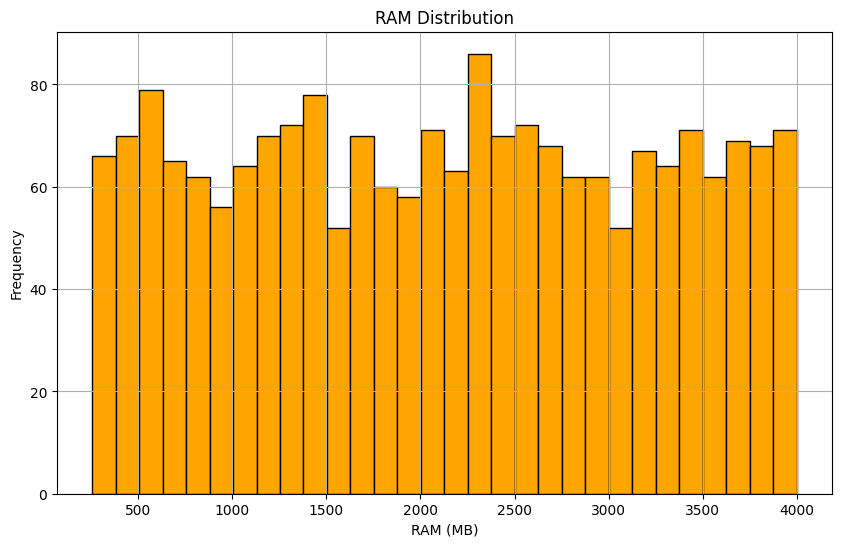

In [82]:
plt.figure(figsize=(10, 6))
df['ram'].hist(bins=30, color='orange', edgecolor='black')
plt.title('RAM Distribution')
plt.xlabel('RAM (MB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Most likely, this value is the most in demand and has optimal characteristics for reliable operation of the phone in any conditions (different number of cores, capacity of batteries, memory, and so on)

<ipython-input-75-e7c6bd945d09>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='ram', data=df, palette='pastel')


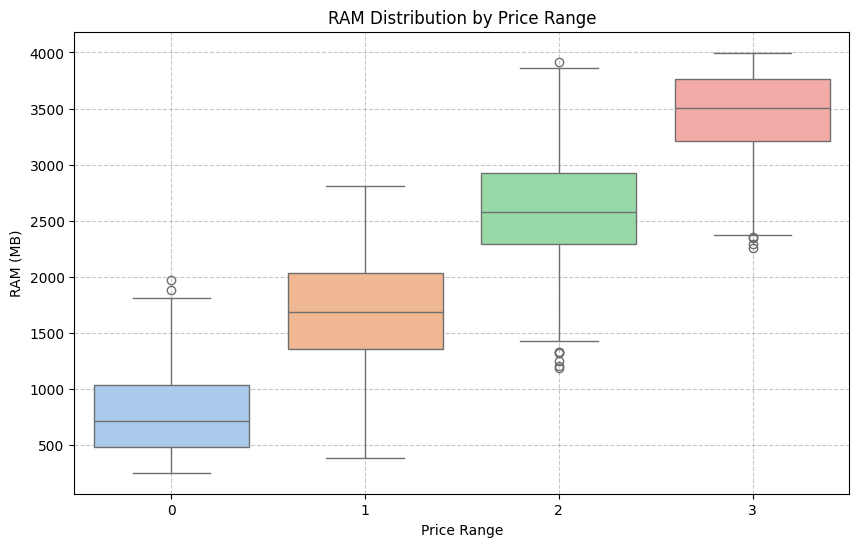

In [75]:
plt.figure(figsize=(10,6))
sns.boxplot(x='price_range', y='ram', data=df, palette='pastel')
plt.title('RAM Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM (MB)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

we see that, taking into account outlayers, all price categories intersect at a value of 2300. However, there is also a general trend - with an increase in price, the amount of RAM also increases

Memory (Gb) statistics, distribution and correlations

In [21]:
mean_int_memory = df['int_memory'].mean()
median_int_memory = df['int_memory'].median()
mode_int_memory = df['int_memory'].mode().iloc[0]
print(f"Mean memory GB: {mean_int_memory}")
print(f"Median memory GB: {median_int_memory}")
print(f"Mode memory GB: {mode_int_memory}")
print(f"Max memory GB: {df['int_memory'].max()}, min :{df['int_memory'].min()}")

Mean memory GB: 32.0465
Median memory GB: 32.0
Mode memory GB: 27
Max memory GB: 64, min :2


In [26]:
int_memory_range = df['int_memory'].max() - df['int_memory'].min()
print(f"Total memory Gb range: {int_memory_range}")
int_memory_variance = df['int_memory'].var()
print(f"Total memory Gb variance: {int_memory_variance}")
int_memory_std = df['int_memory'].std()
print(f"Total memory Gb standard deviation: {int_memory_std}")

Total memory Gb range: 62
Total memory Gb variance: 329.26697123561803
Total memory Gb standard deviation: 18.145714955206863


In [31]:
memory_skewness = df['int_memory'].skew()
print(f"Total memory Gb skewness: {memory_skewness}")
memory_kurtosis = df['int_memory'].kurtosis()
print(f"Total memory Gb kurtosis: {memory_kurtosis}")

Total memory Gb skewness: 0.05788932785206039
Total memory Gb kurtosis: -1.2160740301516093


In [40]:
prices_groups_memory = [df[df['price_range']== i]['int_memory'] for i in df['price_range'].unique()]
result = stats.f_oneway(*prices_groups_memory)
print(f"F-statistic: {result.statistic}, p-value: {result.pvalue}")

F-statistic: 2.922996079417897, p-value: 0.03277693883277447


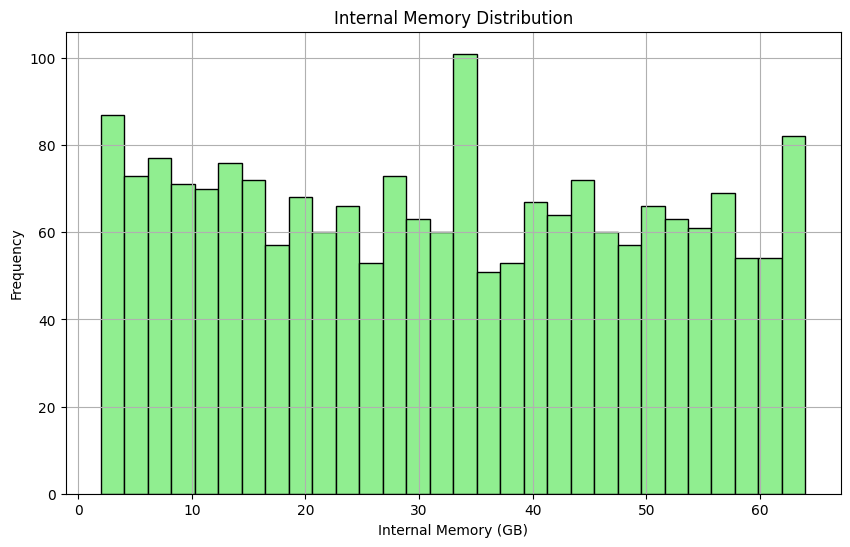

In [81]:
plt.figure(figsize=(10, 6))
df['int_memory'].hist(bins=30, color='lightgreen', edgecolor='black')
plt.title('Internal Memory Distribution')
plt.xlabel('Internal Memory (GB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

here we see the 3 most common values ​​- 2, 32, 64 gigabytes of total phone memory. By a wide margin we can note 32, which is the most popular value among all models

<ipython-input-84-7f3ffc0c1a75>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='int_memory', data=df, palette='viridis')


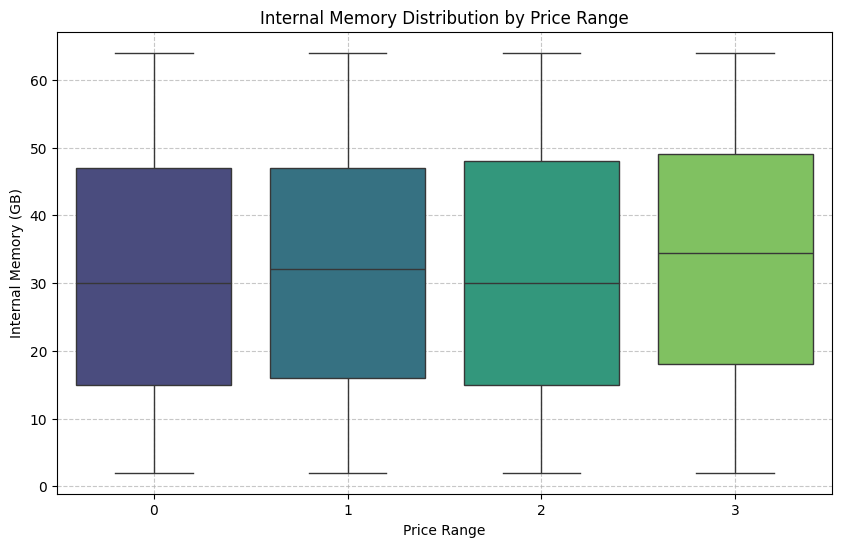

In [84]:
plt.figure(figsize=(10,6))
sns.boxplot(x='price_range', y='int_memory', data=df, palette='viridis')
plt.title('Internal Memory Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Internal Memory (GB)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

we can conclude that buyers focus on the average value of 32 when choosing a model and are ready to move a little more or a little less from this value, but not too far (2,4,8,10). For the buyer, 32 is a kind of standard, the minimum necessary for comfortable use of the phone and storage of information

Talk time (in hours with full charged battery) statistics, distribution and correlations

In [22]:
mean_talk_time = df['talk_time'].mean()
median_talk_time = df['talk_time'].median()
mode_talk_time = df['talk_time'].mode().iloc[0]
print(f"Mean talk time Hours: {mean_talk_time}")
print(f"Median talk time Hours: {median_talk_time}")
print(f"Mode talk time Hours: {mode_talk_time}")
print(f"Max talk time Hours: {df['talk_time'].max()}, min :{df['talk_time'].min()}")

Mean talk time Hours: 11.011
Median talk time Hours: 11.0
Mode talk time Hours: 7
Max talk time Hours: 20, min :2


In [27]:
talk_time_range = df['talk_time'].max() - df['talk_time'].min()
print(f"Talk time hrs range: {talk_time_range}")
talk_time_variance = df['talk_time'].var()
print(f"Talk time hrs variance: {talk_time_variance}")
talk_time_std = df['talk_time'].std()
print(f"Talk time hrs standard deviation: {talk_time_std}")

Talk time hrs range: 18
Talk time hrs variance: 29.854806403201582
Talk time hrs standard deviation: 5.463955197766686


In [32]:
talk_time_skewness = df['talk_time'].skew()
print(f"Talk time hrs skewness: {talk_time_skewness}")
talk_time_kurtosis = df['talk_time'].kurtosis()
print(f"Talk time hrs kurtosis: {talk_time_kurtosis}")

Talk time hrs skewness: 0.009511762221541457
Talk time hrs kurtosis: -1.2185909629106917


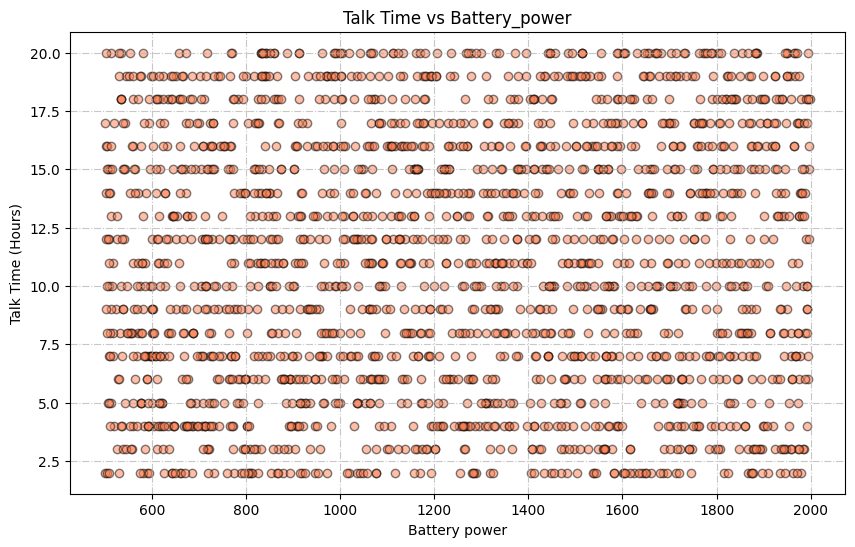

In [87]:
# creating scatter plot for visualisation correlation between battery power and long term phone usage ability
plt.figure(figsize=(10,6))
plt.scatter(df['battery_power'], df['talk_time'], alpha=0.5, edgecolor='k', color='coral')
plt.title('Talk Time vs Battery_power')
plt.xlabel('Battery power')
plt.ylabel('Talk Time (Hours)')
plt.grid(True, linestyle='-.', alpha=0.7)
plt.show()

Due to the fact that it is now possible to charge your phone almost anywhere, there is no such urgent need as uninterrupted operation of the device over a long period of time. Different models consume different amounts of energy to operate the device, regardless of the battery size, so we see approximately the same values ​​in all segments. These indicators do not directly affect each other separately from all others (for example, screen size, brightness, power consumption, additional features and applications, and so on)

Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

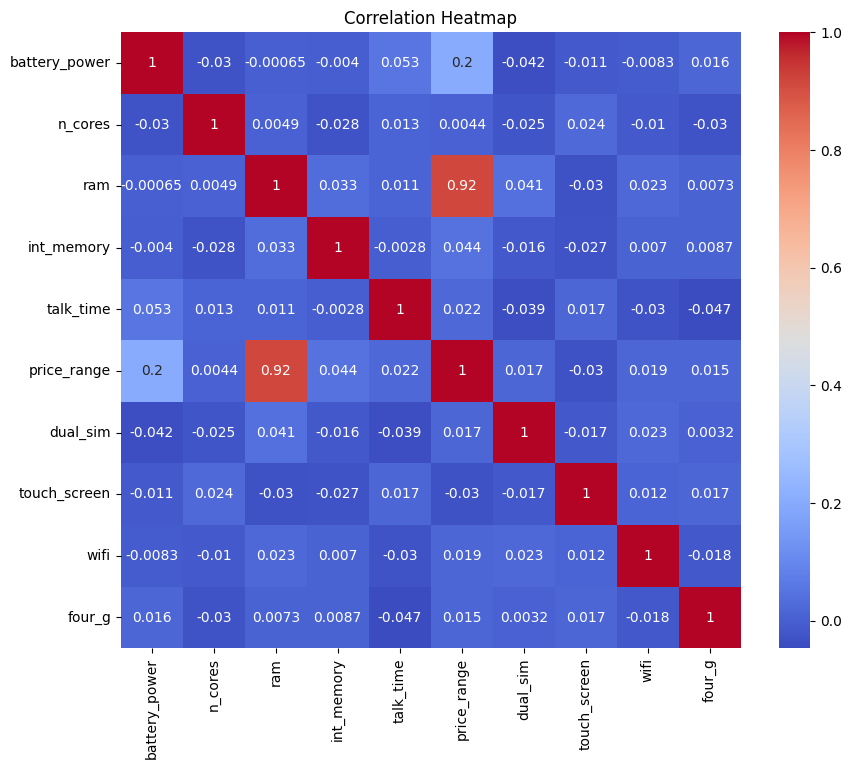

In [37]:
# defining most price dependent features for correlation heatmap
df_corr = df[['battery_power', 'n_cores', 'ram', 'int_memory', 'talk_time','price_range','dual_sim','touch_screen','wifi','four_g']]
correlations = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

We see the strongest connection between price and battery capacity, price and RAM

T-test most intresting pairs: batter vs price, ram vs price, touch_screen vs ram, four_g vs price, dual_sim vs price, wifi vs price

In [90]:
dual_sim0 = df[df['dual_sim'] == 0]['price_range']
dual_sim1 = df[df['dual_sim'] == 1]['price_range']
result = stats.ttest_ind(dual_sim0, dual_sim1)
print(f"T-statistic: {result.statistic}, p-value: {result.pvalue}")

T-statistic: -0.7798693301404264, p-value: 0.4355601630195083


There is no statistically significant difference in the price range between phones with and without dual SIM support.

In [42]:
wifi_0 = df[df['wifi'] == 0]['price_range']
wifi_1 = df[df['wifi'] == 1]['price_range']
result = stats.ttest_ind(wifi_0, wifi_1)
print(f"T-statistic: {result.statistic}, p-value: {result.pvalue}")

T-statistic: -0.8398103705387349, p-value: 0.4011151943555159


There is no statistically significant difference in the price range between phones with and without WIFI support.

In [43]:
four_g0 = df[df['four_g'] == 0]['price_range']
four_g1 = df[df['four_g'] == 1]['price_range']
result = stats.ttest_ind(four_g0, four_g1)
print(f"T-statistic: {result.statistic}, p-value: {result.pvalue}")

T-statistic: -0.6603526788823791, p-value: 0.509103652976587


There is no statistically significant difference in the price range between phones with and without 4g support.

In [44]:
touch_0 = df[df['touch_screen'] == 0]['price_range']
touch_1 = df[df['touch_screen'] == 1]['price_range']
result = stats.ttest_ind(touch_0, touch_1)
print(f"T-statistic: {result.statistic}, p-value: {result.pvalue}")

T-statistic: 1.3599733181025475, p-value: 0.17399179859449335


There is no statistically significant difference in the price range between phones with and without touch screen support.

In [93]:
t_stat, p_value = ttest_ind(df['battery_power'], df['price_range'])
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 125.8959441986668, p-value: 0.0


since the t-statistic value is very large, we can conclude that the battery size directly affects the price of the device

In [103]:
t_stat, p_value = ttest_ind(df['ram'], df['price_range'])
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 87.51521760975045, p-value: 0.0


the same conclusion is correct for RAM, the more a model has, the more expensive it is

F-statistic: 3520.110823895761, p-value: 0.0


<ipython-input-105-af121876b16e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='price_labels',y='ram', data=df, palette='muted')


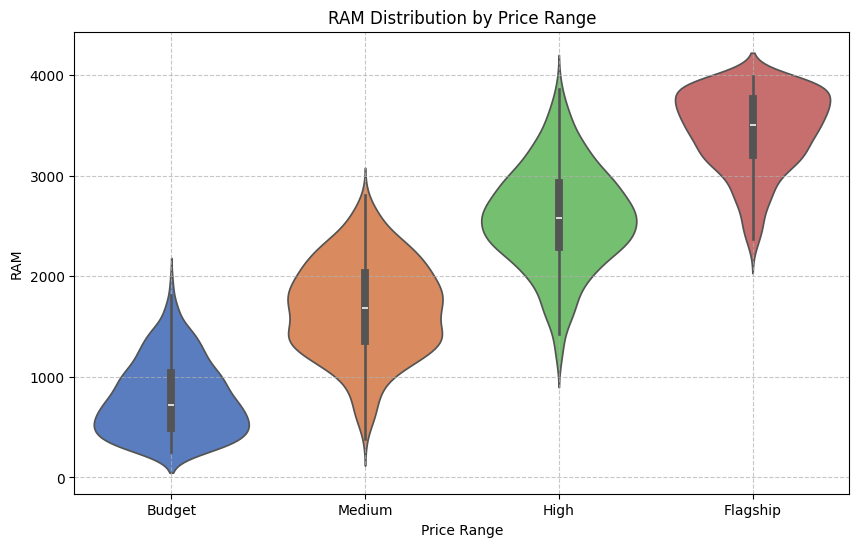

In [105]:
# creating price bins
price_0 = df[df['price_range'] == 0]['ram']
price_1 = df[df['price_range'] == 1]['ram']
price_2 = df[df['price_range'] == 2]['ram']
price_3 = df[df['price_range'] == 3]['ram']
result = stats.f_oneway(price_0, price_1, price_2, price_3)
print(f"F-statistic: {result.statistic}, p-value: {result.pvalue}")
# creating price labels for better readability
price_labels = {0:'Budget', 1:'Medium',2:'High',3:'Flagship'}
df['price_labels'] = df['price_range'].map(price_labels)
price_order = ['Budget', 'Medium', 'High', 'Flagship']
df['price_labels'] = pd.Categorical(df['price_labels'], categories=price_order, ordered=True)
# sorting them asc for better readability and understanding
plt.figure(figsize=(10,6))
sns.violinplot(x='price_labels',y='ram', data=df, palette='muted')
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.title('RAM Distribution by Price Range')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

in this graph the relationship between price and RAM is most pronounced, the lowest memory values ​​are in the lowest price range, and the highest in the high price range, respectively; for medium and high prices we see a normal distribution of values

**Total overwiev and conclusions:
We can conclude that the price of the device is primarily affected by the battery size and the amount of RAM. It is important for the buyer that the model has at least average values ​​of these indicators (2 GB of memory and 1600 battery capacity).
One can imagine the ideal option for all buyers of all price categories - 1600 battery, 4 cores, 2 GB of memory, 32 GB of storage.
Indicators such as the presence of a second SIM card, Wi-Fi support, wide screen or continuous operation time of the device are more specific needs of each individual client, which also undoubtedly influence the cost of the device in each price category, but to a lesser extent than other indicators.
The selection of a model based on these indicators is already largely worked out by salespeople in stores, while manufacturers only need to provide variations of standard models with and without these functions.
Most likely, given the data, the average buyer will find the ideal phone model in the middle and high price categories, containing the main advantages of models, including those from the high price category, that will satisfy all needs. **